<font color='blue'> **Zahasky_08_________________d_________________ from 10___RMG_1_PyGSLIB** </font> 

In [1]:
import flopy; import sys; import os; import time; import numpy as np; import matplotlib.pyplot as plt        ; from pathlib import Path ; import pandas as pd
EXF='E:\\15_REPOS\\00_BETAMI\\bin\\MF2005.exe' ; EXT='E:\\15_REPOS\\00_BETAMI\\bin\\mt3d-usgs_1.1.0_64.exe'  ; _R=Path("_R"); _R.mkdir(exist_ok=True)       ; import gstools as gs  
TA=Path("_R/_08e"); TA.mkdir(exist_ok=True)    ; REF1= ('E:/15_REPOS/02_Beta-Me/data/Madison')               ; D1=os.path.join(REF1,'A_sig100.csv');D2=os.path.join(REF1,'output.csv')
import geostatspy.geostats as geostats         ; sys.path.append('E:/15_REPOS/02_Beta-Me/data/Krig/BibliOS') ; from geostats import backtr     #backtr? 

In [2]:
NO= np.loadtxt(D2,delimiter=',')      ;nrow= 20 ;ncol= 40     ; HL1=NO.reshape(1,nrow,ncol)   ; HL1=HL1        ; R=nrow;C=ncol ; FIG1=HL1[0,:,:]  ; F1=HL1.reshape(R,C)
XX = range(nrow);ZZ=range(ncol)                                                                  
M1 = gs.Exponential(dim=2, var=200, len_scale=[1000, 500, .01],nugget=0.05  ,angles=np.pi / 2)        ; srf=gs.SRF(M1)  ; nn=srf.structured([XX, ZZ]) ;print('nn:',nn.shape)
VA1=np.linspace(np.min(srf.field),np.max(srf.field),5); FIG2  =srf.transform("discrete",store="f1",values=VA1)   ; FIG2=abs(FIG2)/10    ; F2=FIG2.reshape(R,C)  ; HL2=FIG2.reshape(1,20,40)

G25=[0.25,0.25] ;Lx=(ncol-1)*G25[1];Ly=(nrow-1)*G25[0]      ; y,x=np.mgrid[slice(0,Ly+G25[0],G25[0]),slice(0,Lx+G25[1],G25[1])]

nn: (20, 40)


In [7]:
n='n'                   ; delv = 0.25        ; delr = 0.25         ; delc = 1  ; VV = 0.01 
HL1_size = HL1.shape    ; nlay=HL1_size[0]   ; nrow=HL1_size[1]    ; ncol=HL1_size[2]          ; K_MEAN=np.exp(np.sum(np.log(HL1))/HL1.size) ;RO=0.3 ;q=VV*RO ;Lx=(ncol-1)*delr
print(nlay,nrow,ncol)

1 20 40


In [5]:
TRPT =0.1 ; itype= -1 ; DISP = 0.01; DISP = 0.2                                       ; itmuni=1; lenuni=3 ;MTU='S';MTV='CM'
PERLEN_T = [60*3,60*58]        ; NPER_T = len(PERLEN_T)   ; NPRS = 100
PERLEN_F = [np.sum(PERLEN_T)]  ; NPER_F = len(PERLEN_F)   ; TIMPRS=np.linspace(0,np.sum(PERLEN_F), NPRS, endpoint = False)  ; print('PERLEN_T :',PERLEN_T, 'PERLEN_F :',PERLEN_F)

    
IB = np.ones((nlay, nrow, ncol) , dtype=int)        ; IB[0,:,0]=-1 ;IB[0,:,-1] = -1      
IC = np.zeros((nlay,nrow,ncol),dtype=float)         ; H1   = q*Lx/K_MEAN  ;IC[0,:,0]= H1

IBC = np.ones((nlay, nrow, ncol) , dtype=int)                                       ; SCONC = np.zeros((nlay, nrow, ncol), dtype=float)   ; C_IN = [1.0, 0.0] 

CTT = np.zeros((nrow, 5), dtype=float)
for row in range(0, nrow):   CTT[row] = [0, row, 0, C_IN[0], itype]                           
CW2 = CTT.copy()            ;CW2[:,3] =             C_IN[1]                    ; MTW_S = {0:CTT, 1:CW2}        ; MF='DIR'+'_mf';MT='DIR'+'_mt'  ;WS=os.path.join(TA,'DIR')

mf  = flopy.modflow.Modflow (modelname=MF, model_ws=WS, exe_name=EXF)
dis = flopy.modflow.ModflowDis (mf, nlay=nlay, nrow=nrow, ncol=ncol, nper=NPER_F, delr=delr, delc=delc, top=0., botm=[0 - delv],perlen=PERLEN_F, itmuni=itmuni, lenuni=lenuni)
bas = flopy.modflow.ModflowBas (mf, ibound=IB, strt=IC)                                                                 ; 

lpf = flopy.modflow.ModflowLpf(mf, hk=HL1, laytyp=0)

pcg = flopy.modflow.ModflowPcg (mf) ;lmt = flopy.modflow.ModflowLmt(mf) ; oc = flopy.modflow.ModflowOc(mf)                        ;mf.write_input() ;mf.run_model(silent=True) 


hdobj  = flopy.utils.HeadFile(os.path.join(WS, MF+'.hds'))       ; HE1 = hdobj.get_data()               ; print("Inlet_H:"+str(H1) + "('Cm')") 


PERLEN_T : [180, 3480] PERLEN_F : [3660]
Inlet_H:0.010337753991322533('Cm')


<font color='orange'> **RES_01 ________________________________________________________________________________________________________________________** </font>

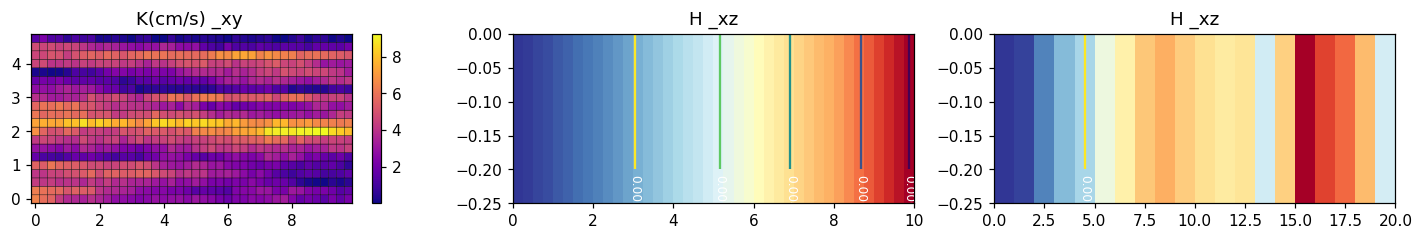

In [6]:
VV1=np.min(HE1[0]) ; VV2=np.max(HE1[0])   ; LH=np.arange(VV1, VV2, VV2/5)
fig = plt.figure(figsize=(16, 2), dpi=110)  
ax=fig.add_subplot(131) ;plt.pcolor(x,y,FIG1 ,cmap='plasma',shading='auto',edgecolor='k')  ;plt.colorbar() ;plt.title('K(cm/s) _xy ') 
ax=fig.add_subplot(132);SU=flopy.plot.PlotCrossSection(model=mf,line={'Row':0});UU=SU.contour_array(HE1,levels=LH) ;plt.clabel(UU,colors='w',fontsize=8); HV=SU.plot_array(HE1,head=HE1,cmap='RdYlBu');plt.title("H _xz")#;plt.axis('off') 
ax=fig.add_subplot(133);SU=flopy.plot.PlotCrossSection(model=mf,line={'Column':10});UU=SU.contour_array(HE1,levels=LH) ;plt.clabel(UU,colors='w',fontsize=8); HV=SU.plot_array(HE1,head=HE1,cmap='RdYlBu');plt.title("H _xz")#;plt.axis('off') 
plt.show()